In [52]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import binned_statistic
import math

In [53]:
cvfolds = 54
pred_y = np.load("lstm_cv54.npy")
#pred_y = np.load("myrawlstm_cv54_stateless.npy")
seqlen = pred_y.shape[1]
#seqlen = 100
pred_y = pred_y.reshape((-1, 2))
print pred_y.shape, seqlen, np.min(pred_y), np.max(pred_y)

(5400L, 2L) 100 3.91526865959 106.4347229


In [54]:
y = np.loadtxt("London_data_2x1000Center_bin100_pos.dat") / 3.5
#y = np.load("London_RNN_data_2x1000_at50_bin100-RAW_pos.npy")
print y.shape, np.min(y), np.max(y)

(5400L, 2L) 4.46114285714 107.2


In [55]:
def mse(y, t, axis=2):
    return (np.square(y - t).mean(axis=axis).mean())

def mean_distance(y, t, axis=2):
    return np.mean(np.sqrt(np.sum((y - t)**2, axis=axis)))

In [56]:
print mse(pred_y[:1100], y[:1100], axis=1), mean_distance(pred_y[:1100], y[:1100], axis=1)
print mse(pred_y[4400:], y[4400:], axis=1), mean_distance(pred_y[4400:], y[4400:], axis=1)

67.7995742324 10.0760789941
87.9188877531 10.9662379903


In [57]:
errors = np.sqrt(np.sum((pred_y - y)**2, axis=1))
print np.mean(errors), errors.shape

9.83991469004 (5400L,)


In [58]:
meanerrors = np.mean(np.reshape(errors, (cvfolds, -1)), axis=1)
print meanerrors, meanerrors.shape

[ 15.64548288   8.62664742   8.23176831   7.66958878   9.30311571
  10.68924739   7.32369067  10.38209818   9.80559933   9.80164417
  13.35798609  18.58412177   7.19675367   5.70112173   8.5441205
   8.58729396  16.54178832  12.83568208   6.99270509   8.34893207
   6.95937649   7.64524736  10.13849424   7.95617369   7.40792984
  10.86232048   7.72061231  10.244179     9.46430448   9.13310706
  10.98056472   9.70563005   9.39620361   7.21575821   9.53588172
   7.48714634   6.71439113   8.0304772    9.58771031   8.6097806
  16.22741112   8.15861681   8.80663202   9.53567644  17.18673765
  10.33554747   9.25774051  13.4401155    9.26712285   8.40032786
  12.96888778  12.30482023  10.02436676   6.4767133 ] (54L,)


In [59]:
plotmeanerrors = np.repeat(meanerrors, errors.shape[0] / cvfolds)
print plotmeanerrors.shape, plotmeanerrors[:20]

(5400L,) [ 15.64548288  15.64548288  15.64548288  15.64548288  15.64548288
  15.64548288  15.64548288  15.64548288  15.64548288  15.64548288
  15.64548288  15.64548288  15.64548288  15.64548288  15.64548288
  15.64548288  15.64548288  15.64548288  15.64548288  15.64548288]


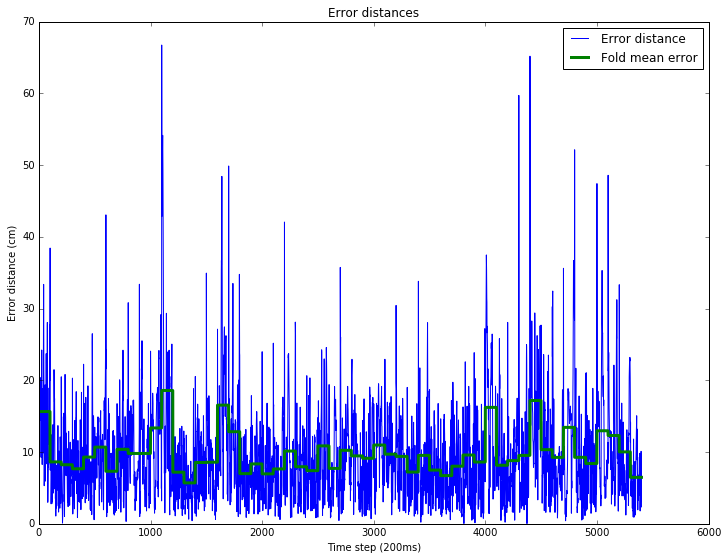

In [60]:
plt.figure(figsize=(12,9))
plt.plot(errors)
plt.plot(plotmeanerrors, linewidth=3);
plt.legend(("Error distance", "Fold mean error"))
plt.title("Error distances")
plt.ylabel("Error distance (cm)")
plt.xlabel("Time step (200ms)")

(54L, 100L)
(100L,)


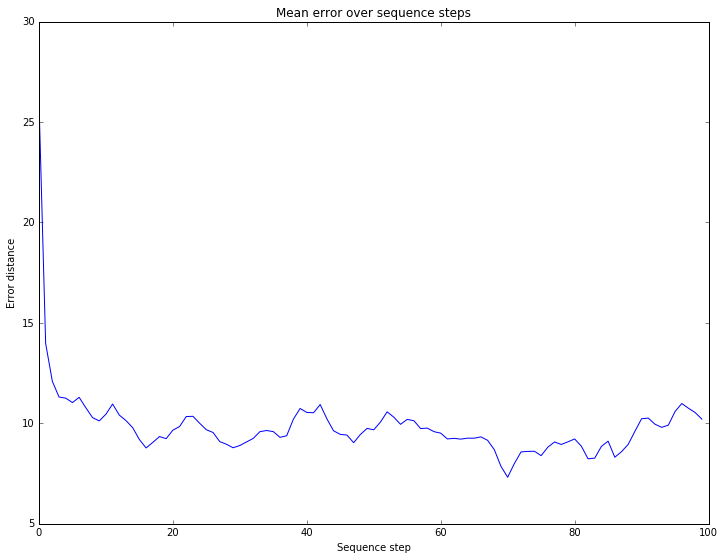

In [61]:
seqerrors = np.reshape(errors, (-1,100))
print seqerrors.shape
meanerrors = np.mean(seqerrors, axis=0)
print meanerrors.shape
plt.figure(figsize=(12,9))
plt.plot(meanerrors);
plt.title("Mean error over sequence steps")
plt.ylabel("Error distance")
plt.xlabel("Sequence step")

In [62]:
pred_y2 = np.load("lstm_cv54_stateful.npy").reshape((-1, 2))
print pred_y2.shape
#y2 = np.load("London_RNN_data_2x1000_at50_bin100-RAW_pos.npy")
y2 = np.loadtxt("London_data_2x1000Center_bin100_pos.dat") / 3.5
errors2 = np.sqrt(np.sum((pred_y2 - y2)**2, axis=1))
print np.mean(errors2), errors2.shape

(5400L, 2L)
9.83991469004 (5400L,)


(54L, 100L)
(100L,)


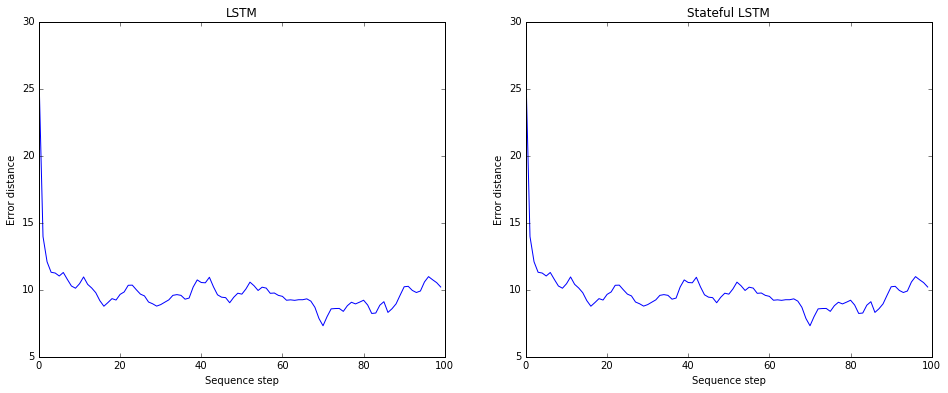

In [63]:
seqerrors2 = np.reshape(errors2, (-1,100))
print seqerrors2.shape
meanerrors2 = np.mean(seqerrors2, axis=0)
print meanerrors2.shape
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(meanerrors);
plt.title("LSTM")
plt.ylabel("Error distance")
plt.xlabel("Sequence step")
plt.subplot(1,2,2)
plt.plot(meanerrors2);
plt.title("Stateful LSTM")
plt.ylabel("Error distance")
plt.xlabel("Sequence step")
#plt.ylim([8, 26])

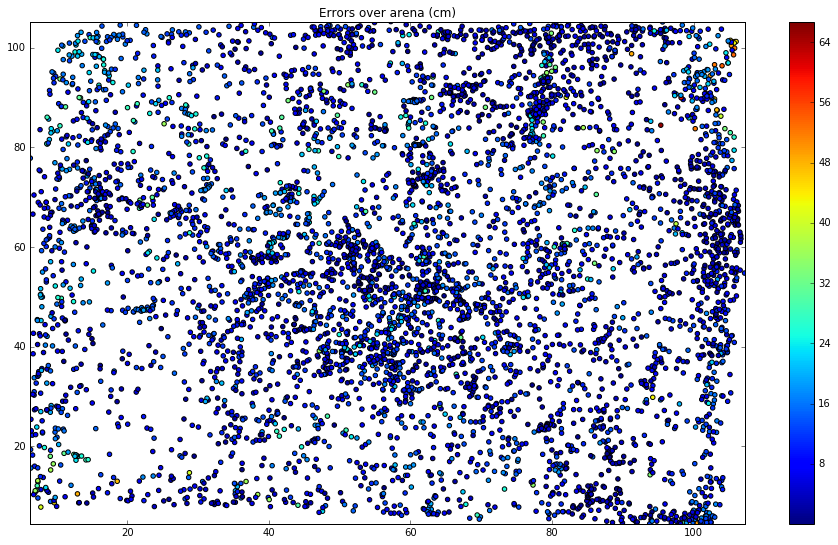

In [64]:
plt.figure(figsize=(16,9))
plt.scatter(y[:,0], y[:,1],c=errors)
plt.xlim([np.min(y[:,0]), np.max(y[:,0])])
plt.ylim([np.min(y[:,1]), np.max(y[:,1])])
plt.colorbar();
plt.title("Errors over arena (cm)")

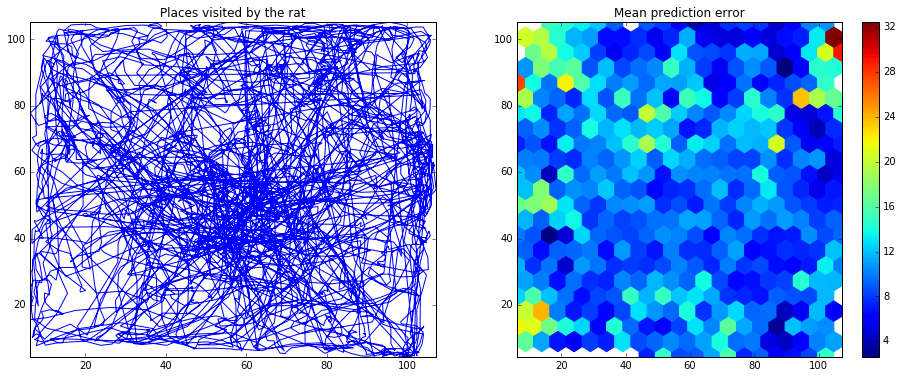

In [65]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(y[:,0], y[:,1]);
plt.title("Places visited by the rat")
plt.xlim([np.min(y[:,0]), np.max(y[:,0])])
plt.ylim([np.min(y[:,1]), np.max(y[:,1])])
plt.subplot(1,2,2)
plt.title("Mean prediction error")
plt.hexbin(y[:,0], y[:,1],C=errors, gridsize=20)
plt.colorbar();

In [66]:
seqy = np.reshape(y, (-1, 100, 2))
print seqy.shape
diff = seqy[:,1:,:] - seqy[:,:-1,:]
print diff.shape
diff  = np.reshape(diff, (-1, 2))
print diff.shape

differrors = np.reshape(seqerrors[:,1:], (-1))
print differrors.shape

(54L, 100L, 2L)
(54L, 99L, 2L)
(5346L, 2L)
(5346L,)


In [67]:
dists = np.sqrt(np.sum(diff**2, axis=1))
print dists.shape, np.mean(dists)

(5346L,) 3.75025333672


101 100


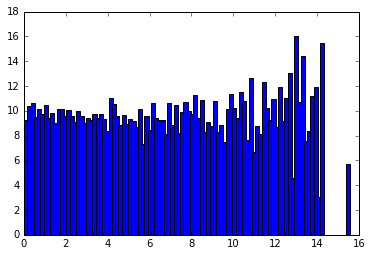

In [68]:
nb_bins = 100
bins = binned_statistic(dists, differrors, statistic='mean', bins=nb_bins)
print len(bins.bin_edges), len(bins.statistic)
plt.bar(bins.bin_edges[:-1], bins.statistic,width=0.2);

In [69]:
angles = np.arctan2(diff[:,1], diff[:,0])
print angles.shape

(5346L,)


In [70]:
nb_bins = 100
bins = binned_statistic(angles, differrors, statistic='mean', bins=nb_bins)
print len(bins.bin_edges), len(bins.statistic)

101 100


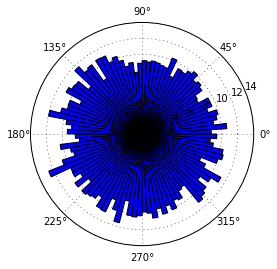

In [71]:
plt.gca(projection='polar')
plt.bar(bins.bin_edges[:-1], bins.statistic, width=2*math.pi/nb_bins);

(1.2745714285714287, 30.068000000000001)

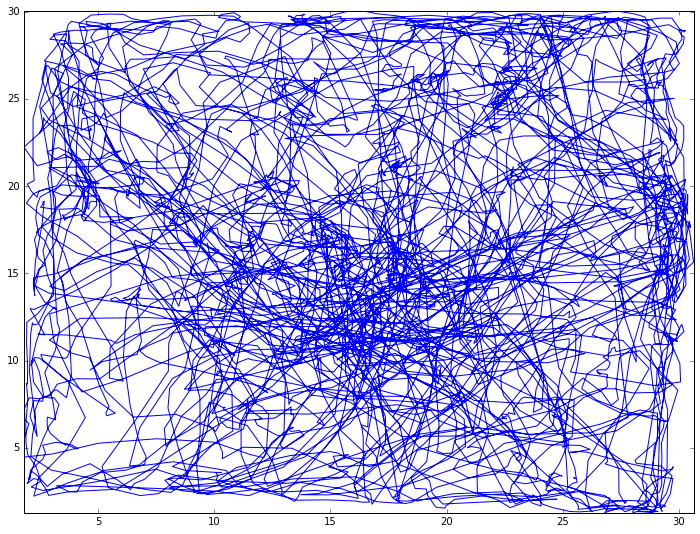

In [72]:
y = np.loadtxt("London_RNN_data_2x1000_at50_bin100-RAW_pos.dat") / 3.5
plt.figure(figsize=(12,9))
plt.plot(y[:,0], y[:,1]);
plt.xlim([np.min(y[:,0]), np.max(y[:,0])])
plt.ylim([np.min(y[:,1]), np.max(y[:,1])])

(1.2745714285714287, 30.068000000000001)

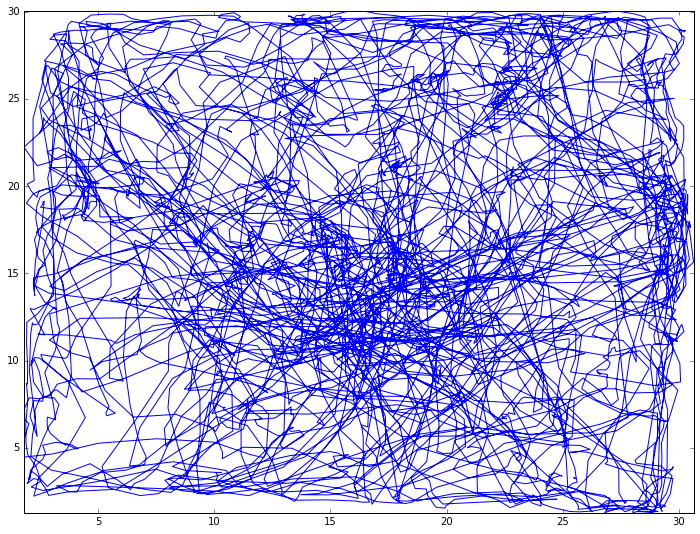

In [73]:
y = np.loadtxt("London_RNN_data_2x1000_at50_bin100-RAW_pos.dat") / 3.5
plt.figure(figsize=(12,9))
plt.plot(y[:,0], y[:,1]);
plt.xlim([np.min(y[:,0]), np.max(y[:,0])])
plt.ylim([np.min(y[:,1]), np.max(y[:,1])])